# <span style="color:blue">Explainable AI in Natural Language Processing - Preprocessing Notebook</span>

## LSTM Keras Implementation & Training (Please don't forget to check and run the 1st Python Preprocessing Notebook of this Project)

Dataset: [Kaggle Twitter Hatespeech Dataset](https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech)

Author: Amir Mozahebi <br>
Thesis: Analysis of Explainable AI methods in Natural Language Processing 

Notebook Agenda:
1. Load data from 1st Notebook
2. Implementation of LSTM using Tensorflow Keras

In [1]:
%store -r sequenceLength
%store -r vocabSize
%store -r paddedTrainSequences
%store -r trainLabels
%store -r paddedTestSequences
%store -r testLabels
%store -r tokenizer

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
model = keras.models.Sequential()
model.add(layers.Embedding(vocabSize, 32, input_length=sequenceLength))
model.add(layers.LSTM(64,dropout=0.1))
model.add(layers.Dense(1,activation="sigmoid"))

Metal device set to: Apple M1 Pro


2022-08-07 15:36:17.158037: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-07 15:36:17.158159: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            1091168   
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,116,065
Trainable params: 1,116,065
Non-trainable params: 0
_________________________________________________________________


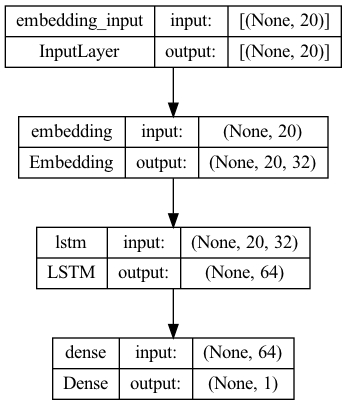

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
num_epochs = 100

In [8]:
history = model.fit(paddedTrainSequences, trainLabels, epochs=num_epochs, validation_data=(paddedTestSequences, testLabels), verbose=1)

Epoch 1/100


2022-08-07 15:36:17.732465: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-07 15:36:18.452539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-07 15:36:18.602574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  3/800 [..............................] - ETA: 21s - loss: 0.6793 - accuracy: 0.9375  

2022-08-07 15:36:18.724276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.9491

2022-08-07 15:36:30.130850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-07 15:36:30.182748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - 14s 16ms/step - loss: 0.1699 - accuracy: 0.9491 - val_loss: 0.1203 - val_accuracy: 0.9598
Epoch 2/100
800/800 [==============================] - 12s 16ms/step - loss: 0.0594 - accuracy: 0.9808 - val_loss: 0.1217 - val_accuracy: 0.9604
Epoch 3/100
800/800 [==============================] - 12s 15ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.1486 - val_accuracy: 0.9565
Epoch 4/100
800/800 [==============================] - 12s 15ms/step - loss: 0.0140 - accuracy: 0.9966 - val_loss: 0.2058 - val_accuracy: 0.9585
Epoch 5/100
800/800 [==============================] - 12s 15ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.2169 - val_accuracy: 0.9576
Epoch 6/100
800/800 [==============================] - 12s 15ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.2257 - val_accuracy: 0.9567
Epoch 7/100
800/800 [==============================] - 12s 15ms/step - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.2562 - val_accuracy: 0.95

Epoch 57/100
800/800 [==============================] - 12s 16ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.3994 - val_accuracy: 0.9540
Epoch 58/100
800/800 [==============================] - 12s 16ms/step - loss: 7.3158e-04 - accuracy: 0.9997 - val_loss: 0.4476 - val_accuracy: 0.9550
Epoch 59/100
800/800 [==============================] - 12s 16ms/step - loss: 7.9775e-04 - accuracy: 0.9996 - val_loss: 0.4460 - val_accuracy: 0.9504
Epoch 60/100
800/800 [==============================] - 12s 16ms/step - loss: 7.1950e-04 - accuracy: 0.9996 - val_loss: 0.4920 - val_accuracy: 0.9495
Epoch 61/100
800/800 [==============================] - 12s 16ms/step - loss: 7.5286e-04 - accuracy: 0.9996 - val_loss: 0.4868 - val_accuracy: 0.9551
Epoch 62/100
800/800 [==============================] - 12s 15ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.3143 - val_accuracy: 0.9559
Epoch 63/100
800/800 [==============================] - 12s 15ms/step - loss: 0.0010 - accuracy: 0.9995 - va

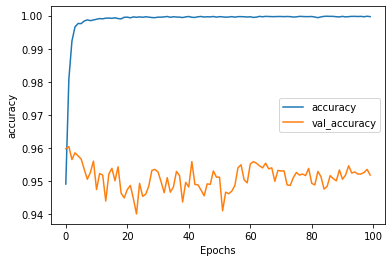

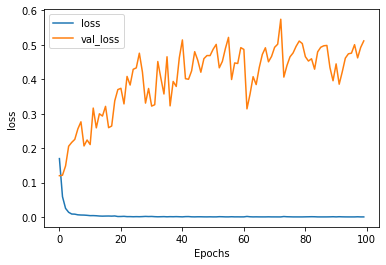

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
#New Test sequences
testSentences = ["I hate rainy days", "I like to eat butter with bread on sunday mornings"]
testSequences = tokenizer.texts_to_sequences(testSentences)
paddedTestSequences = pad_sequences(testSequences, maxlen=sequenceLength, padding="post", truncating="post")
print(paddedTestSequences)

[[   1  139 1767   33    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   1    6    1  643 6545    1 2877    1   71 3164    0    0    0    0
     0    0    0    0    0    0]]


In [11]:
print(model.predict(paddedTestSequences))

1/1 [==============================] - 0s 251ms/step
[[4.8757574e-01]
 [4.6186535e-08]]


2022-08-07 15:56:52.907457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-07 15:56:52.950279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
#Save the model
model.save('../models/lstm_model')

INFO:tensorflow:Assets written to: ../models/lstm_model/assets


INFO:tensorflow:Assets written to: ../models/lstm_model/assets
